In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
% matplotlib inline


In [2]:
train = pd.read_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\Date-Time\data\\train_1.csv"
).fillna(0)
train[:5]


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [4]:
# 把float数据类型，改为int数据类型，可以减少数据的内存占用
for col in train.columns[1:]:
    train[col] = pd.to_numeric(train[col], downcast='integer')
train.head()


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,32,63,15,26,14,20,22,19,18,20
1,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,...,17,42,28,15,9,30,52,45,26,20
2,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,...,3,1,1,7,4,4,6,3,4,17
3,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,...,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0,0,0,0,0,0,0,0,0,...,48,9,25,13,3,11,27,13,36,10


In [5]:
# 可以看到内存占用减小了
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: int32(550), object(1)
memory usage: 305.5+ MB


In [6]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org', page)
    # print (res.group()[0:2])
    if res:
        return res.group()[0:2]
    return 'na'


train['lang'] = train.Page.map(get_language)

from collections import Counter

print(Counter(train.lang))


Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [7]:
lang_sets = {}
lang_sets['en'] = train[train.lang == 'en'].iloc[:, 0:-1]
lang_sets['ja'] = train[train.lang == 'ja'].iloc[:, 0:-1]
lang_sets['de'] = train[train.lang == 'de'].iloc[:, 0:-1]
lang_sets['na'] = train[train.lang == 'na'].iloc[:, 0:-1]
lang_sets['fr'] = train[train.lang == 'fr'].iloc[:, 0:-1]
lang_sets['zh'] = train[train.lang == 'zh'].iloc[:, 0:-1]
lang_sets['ru'] = train[train.lang == 'ru'].iloc[:, 0:-1]
lang_sets['es'] = train[train.lang == 'es'].iloc[:, 0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:, 1:].sum(axis=0) / lang_sets[key].shape[0]


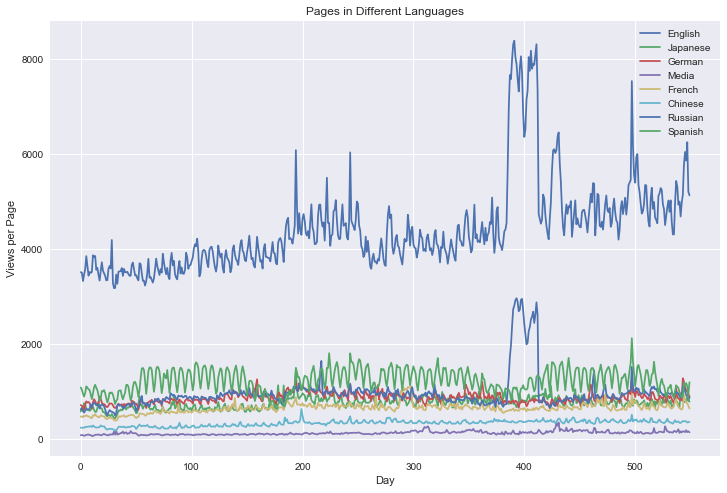

In [9]:
sns.set()
plt.figure(figsize=(12, 8))
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1, figsize=[10, 10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels = {'en': 'English', 'ja': 'Japanese', 'de': 'German',
          'na': 'Media', 'fr': 'French', 'zh': 'Chinese',
          'ru': 'Russian', 'es': 'Spanish'
          }

for key in sums:
    plt.plot(days, sums[key], label=labels[key])

plt.legend()
plt.show()


In [10]:
def plot_entry(key, idx):
    data = lang_sets[key].iloc[idx, 1:]
    fig = plt.figure(1, figsize=(10, 5))
    plt.plot(days, data)
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(train.iloc[lang_sets[key].index[idx], 0])

    plt.show()


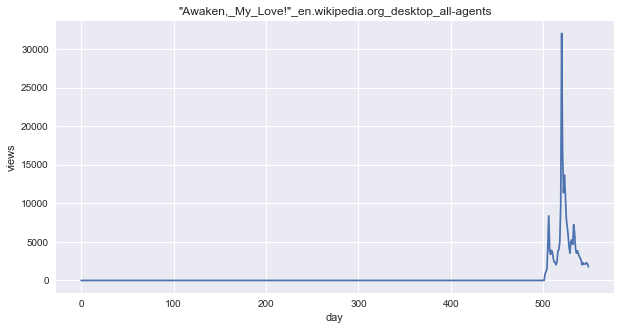

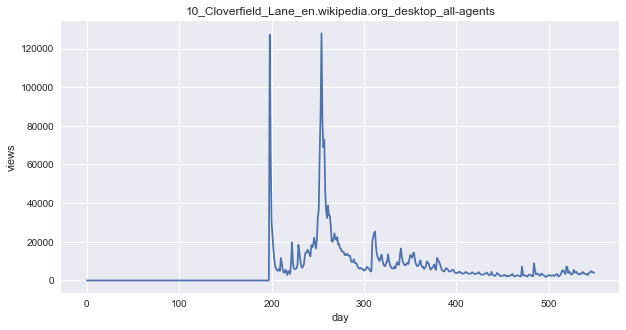

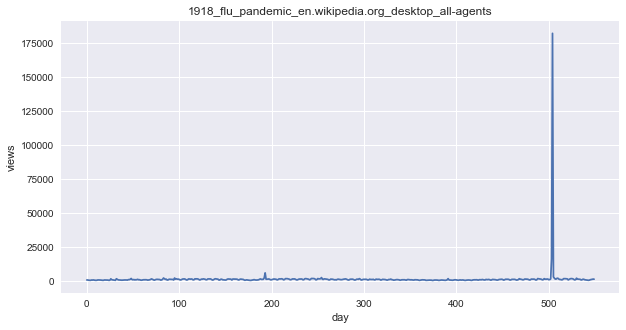

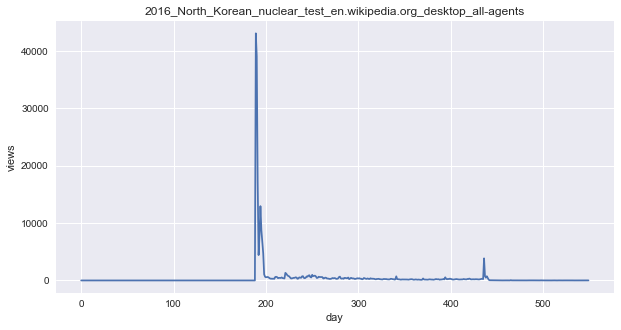

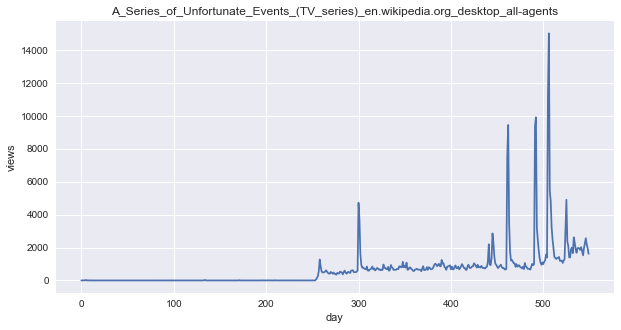

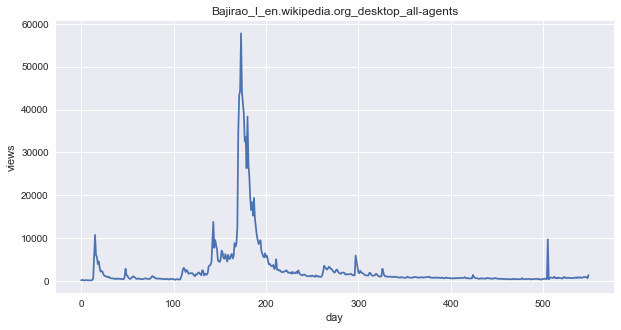

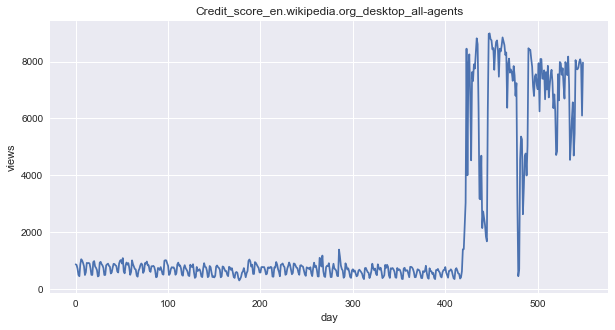

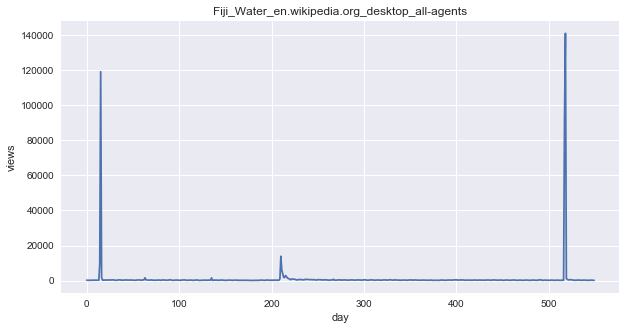

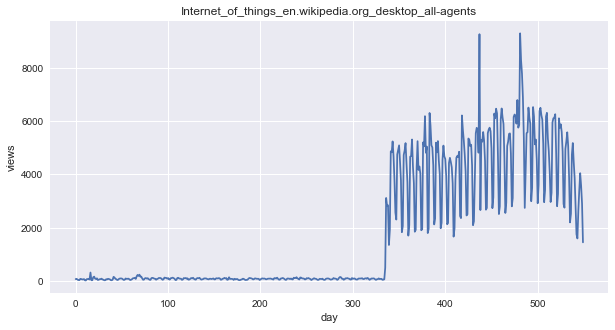

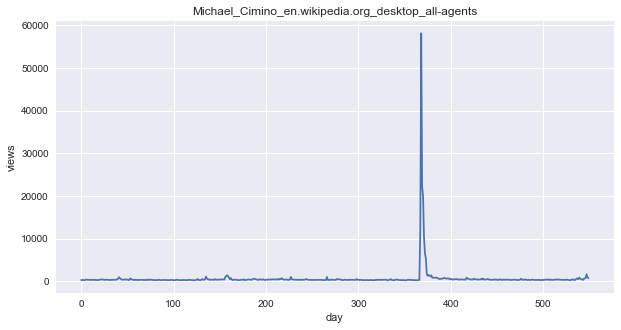

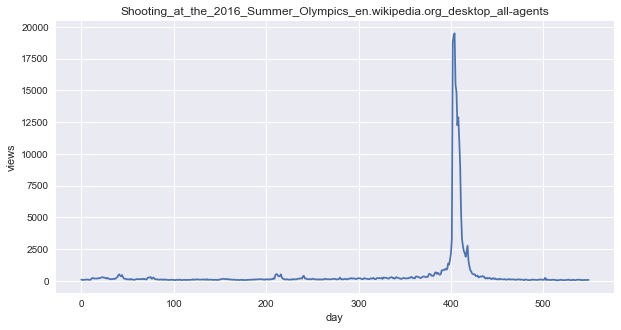

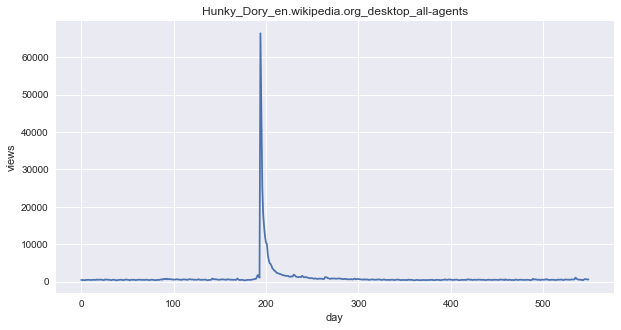

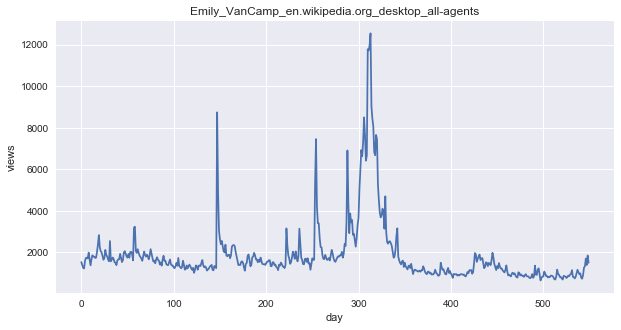

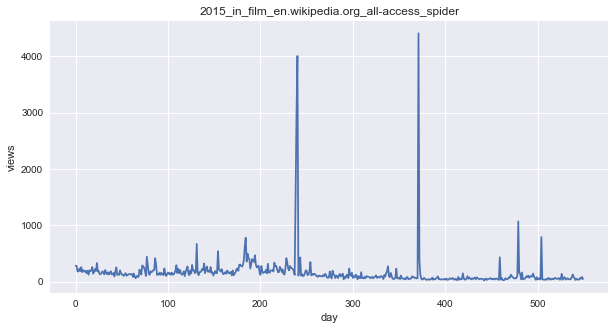

In [11]:
idx = [1, 5, 10, 50, 100, 250, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000]
for i in idx:
    plot_entry('en', i)


In [12]:
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total', ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')


en


                                                    Page        total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  12066181102
9774       Main_Page_en.wikipedia.org_desktop_all-agents   8774497458
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents   3153984882
39180  Special:Search_en.wikipedia.org_all-access_all...   1304079353
10403  Special:Search_en.wikipedia.org_desktop_all-ag...   1011847748
74690  Special:Search_en.wikipedia.org_mobile-web_all...    292162839
39172  Special:Book_en.wikipedia.org_all-access_all-a...    133993144
10399   Special:Book_en.wikipedia.org_desktop_all-agents    133285908
33644       Main_Page_en.wikipedia.org_all-access_spider    129020407
34257  Special:Search_en.wikipedia.org_all-access_spider    124310206



ja


                                                     Page      total
120336      メインページ_ja.wikipedia.org_all-access_all-agents  210753795
86431          メインページ_ja.wikipedia.org_desktop_all-agents  134147415
123025       特別:検索_ja.wikipedia.org_all-access_all-agents   70316929
89202           特別:検索_ja.wikipedia.org_desktop_all-agents   69215206
57309       メインページ_ja.wikipedia.org_mobile-web_all-agents   66459122
119609    特別:最近の更新_ja.wikipedia.org_all-access_all-agents   17662791
88897        特別:最近の更新_ja.wikipedia.org_desktop_all-agents   17627621
119625        真田信繁_ja.wikipedia.org_all-access_all-agents   10793039
123292  特別:外部リンク検索_ja.wikipedia.org_all-access_all-agents   10331191
89463      特別:外部リンク検索_ja.wikipedia.org_desktop_all-agents   10327917



de


                                                     Page       total
139119  Wikipedia:Hauptseite_de.wikipedia.org_all-acce...  1603934248
116196  Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...  1112689084
67049   Wikipedia:Hauptseite_de.wikipedia.org_desktop_...   426992426
140151  Spezial:Suche_de.wikipedia.org_all-access_all-...   223425944
66736   Spezial:Suche_de.wikipedia.org_desktop_all-agents   219636761
140147  Spezial:Anmelden_de.wikipedia.org_all-access_a...    40291806
138800  Special:Search_de.wikipedia.org_all-access_all...    39881543
68104   Spezial:Anmelden_de.wikipedia.org_desktop_all-...    35355226
68511   Special:MyPage/toolserverhelferleinconfig.js_d...    32584955
137765  Hauptseite_de.wikipedia.org_all-access_all-agents    31732458



na


                                                    Page     total
45071  Special:Search_commons.wikimedia.org_all-acces...  67150638
81665  Special:Search_commons.wikimedia.org_desktop_a...  63349756
45056  Special:CreateAccount_commons.wikimedia.org_al...  53795386
45028  Main_Page_commons.wikimedia.org_all-access_all...  52732292
81644  Special:CreateAccount_commons.wikimedia.org_de...  48061029
81610  Main_Page_commons.wikimedia.org_desktop_all-ag...  39160923
46078  Special:RecentChangesLinked_commons.wikimedia....  28306336
45078  Special:UploadWizard_commons.wikimedia.org_all...  23733805
81671  Special:UploadWizard_commons.wikimedia.org_des...  22008544
82680  Special:RecentChangesLinked_commons.wikimedia....  21915202



fr


                                                     Page      total
27330   Wikipédia:Accueil_principal_fr.wikipedia.org_a...  868480667
55104   Wikipédia:Accueil_principal_fr.wikipedia.org_m...  611302821
7344    Wikipédia:Accueil_principal_fr.wikipedia.org_d...  239589012
27825   Spécial:Recherche_fr.wikipedia.org_all-access_...   95666374
8221    Spécial:Recherche_fr.wikipedia.org_desktop_all...   88448938
26500   Sp?cial:Search_fr.wikipedia.org_all-access_all...   76194568
6978    Sp?cial:Search_fr.wikipedia.org_desktop_all-ag...   76185450
131296  Wikipédia:Accueil_principal_fr.wikipedia.org_a...   63860799
26993   Organisme_de_placement_collectif_en_valeurs_mo...   36647929
7213    Organisme_de_placement_collectif_en_valeurs_mo...   36624145



zh


                                                     Page      total
28727   Wikipedia:首页_zh.wikipedia.org_all-access_all-a...  123694312
61350    Wikipedia:首页_zh.wikipedia.org_desktop_all-agents   66435641
105844  Wikipedia:首页_zh.wikipedia.org_mobile-web_all-a...   50887429
28728   Special:搜索_zh.wikipedia.org_all-access_all-agents   48678124
61351      Special:搜索_zh.wikipedia.org_desktop_all-agents   48203843
28089   Running_Man_zh.wikipedia.org_all-access_all-ag...   11485845
30960   Special:链接搜索_zh.wikipedia.org_all-access_all-a...   10320403
63510    Special:链接搜索_zh.wikipedia.org_desktop_all-agents   10320336
60711     Running_Man_zh.wikipedia.org_desktop_all-agents    7968443
30446    瑯琊榜_(電視劇)_zh.wikipedia.org_all-access_all-agents    5891589



ru


                                                     Page       total
99322   Заглавная_страница_ru.wikipedia.org_all-access...  1086019452
103123  Заглавная_страница_ru.wikipedia.org_desktop_al...   742880016
17670   Заглавная_страница_ru.wikipedia.org_mobile-web...   327930433
99537   Служебная:Поиск_ru.wikipedia.org_all-access_al...   103764279
103349  Служебная:Поиск_ru.wikipedia.org_desktop_all-a...    98664171
100414  Служебная:Ссылки_сюда_ru.wikipedia.org_all-acc...    25102004
104195  Служебная:Ссылки_сюда_ru.wikipedia.org_desktop...    25058155
97670   Special:Search_ru.wikipedia.org_all-access_all...    24374572
101457  Special:Search_ru.wikipedia.org_desktop_all-ag...    21958472
98301   Служебная:Вход_ru.wikipedia.org_all-access_all...    12162587



es


                                                     Page      total
92205   Wikipedia:Portada_es.wikipedia.org_all-access_...  751492304
95855   Wikipedia:Portada_es.wikipedia.org_mobile-web_...  565077372
90810   Especial:Buscar_es.wikipedia.org_all-access_al...  194491245
71199   Wikipedia:Portada_es.wikipedia.org_desktop_all...  165439354
69939   Especial:Buscar_es.wikipedia.org_desktop_all-a...  160431271
94389   Especial:Buscar_es.wikipedia.org_mobile-web_al...   34059966
90813   Especial:Entrar_es.wikipedia.org_all-access_al...   33983359
143440  Wikipedia:Portada_es.wikipedia.org_all-access_...   31615409
93094   Lali_Espósito_es.wikipedia.org_all-access_all-...   26602688
69942   Especial:Entrar_es.wikipedia.org_desktop_all-a...   25747141





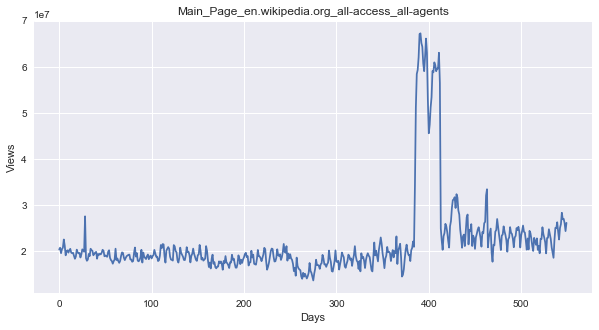

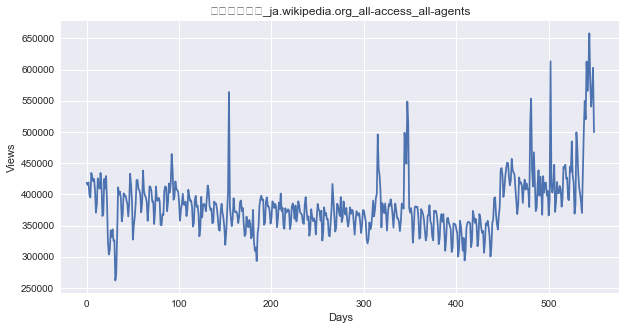

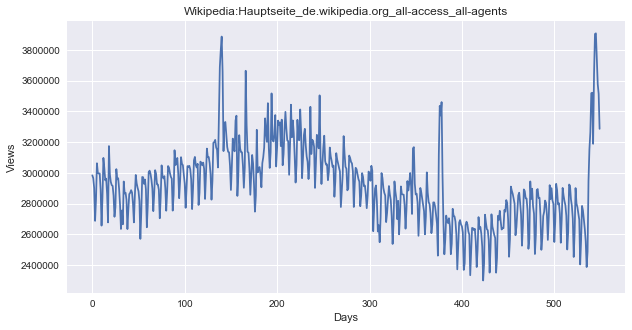

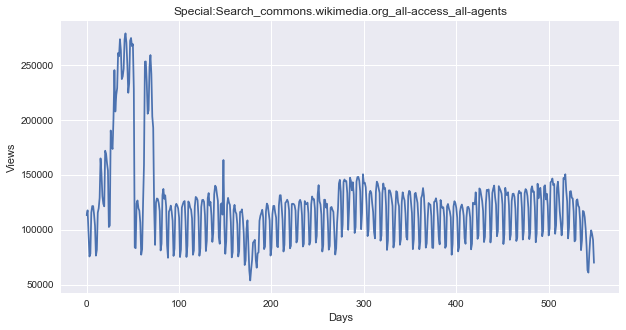

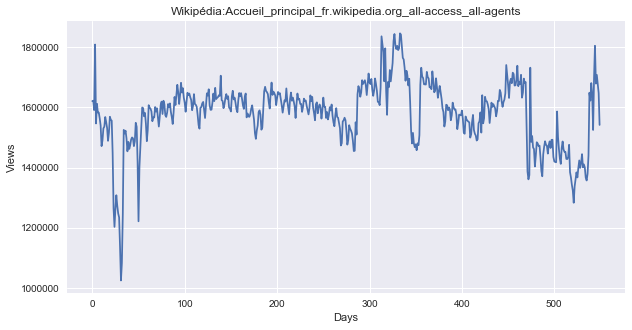

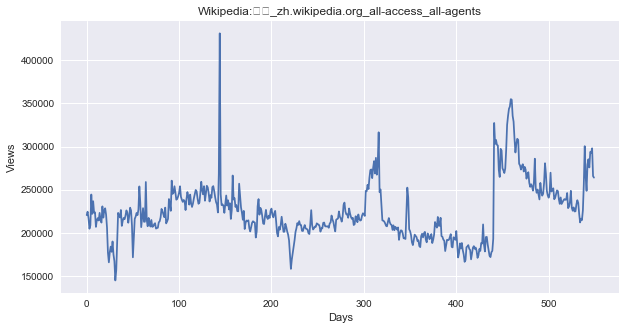

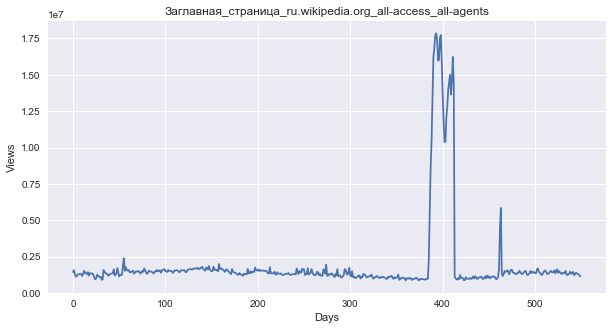

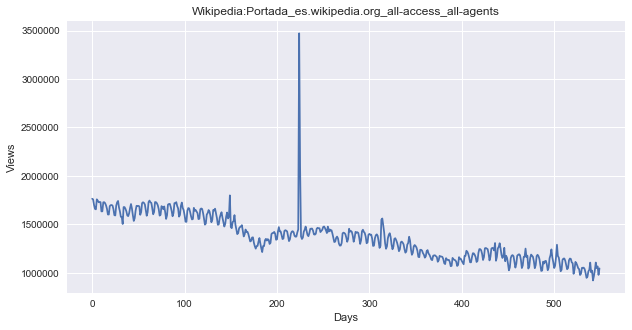

In [13]:
for key in top_pages:
    fig = plt.figure(1, figsize=(10, 5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key], cols]
    plt.plot(days, data)
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.title(train.loc[top_pages[key], 'Page'])
    plt.show()
